<a href="https://colab.research.google.com/github/rrizwan98/Natural-Language-Processing-NLp-/blob/main/BBC_Summary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from nltk.stem import PorterStemmer 
from nltk.tokenize import word_tokenize 
import seaborn as sns

In [ ]:
data = pd.read_csv('bbc.csv')
data.head()


,Unnamed: 0,news,type
0,0,Qatar and Shell in $6bn gas deal\n \n Shell ha...,business
1,1,Slowdown hits US factory growth\n \n US indust...,business
2,2,Call to overhaul UK state pension\n \n The UK ...,business
3,3,Bush to outline 'toughest' budget\n \n Preside...,business
4,4,Winter freeze keeps oil above $50\n \n Oil pri...,business


In [ ]:
data.sample(5, random_state=0)

,Unnamed: 0,news,type
384,384,Huge rush for Jet Airways shares\n \n Indian a...,business
1983,1983,TV's future down the phone line\n \n Internet ...,tech
985,985,Cabinet anger at Brown cash raid\n \n Minister...,politics
1386,1386,Campbell rescues Arsenal\n \n Sol Campbell pro...,sport
1294,1294,Blair 'up for it' ahead of poll\n \n Tony Blai...,politics


In [ ]:
data['category_id'] = data['type'].factorize()[0]

In [ ]:
colslist = ['Index', 'news', 'type', 'category_id']
data.columns = colslist

In [ ]:
#data.tail()

<AxesSubplot:xlabel='type'>

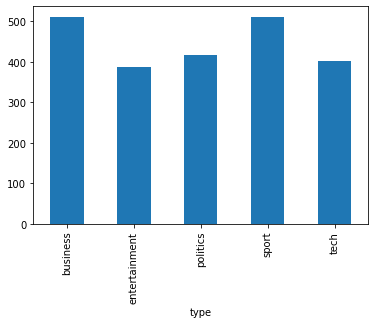

In [ ]:
data.groupby('type').Index.count().plot.bar(ylim=0)

# Bassic Preprocessing

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords=stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/ec2-user/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
data['news_without_stopwords'] = data['news'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))

In [ ]:
print(len(data['news_without_stopwords'][0]))

681


In [ ]:
print(data['news_without_stopwords'])

0       Qatar Shell $6bn gas deal Shell signed $6bn (£...
1       Slowdown hits US factory growth US industrial ...
2       Call overhaul UK state pension The UK pension ...
3       Bush outline 'toughest' budget President Bush ...
4       Winter freeze keeps oil $50 Oil prices carried...
                              ...                        
2220    Mobile music challenges 'iPod age' Nokia Micro...
2221    Broadband takes TV viewing The number European...
2222    Piero gives rugby perspective BBC Sport unveil...
2223    Moving mobile improves golf swing A mobile pho...
2224    Spam e-mails tempt net shoppers Computer users...
Name: news_without_stopwords, Length: 2225, dtype: object


## Porter Stemming

In [ ]:
ps = PorterStemmer()

In [ ]:
data['news_porter_stemmed'] = data['news_without_stopwords'].apply(lambda x: ' '.join([ps.stem(word) for word in x.split()]))

In [ ]:
print(data['news_without_stopwords'][0])

Qatar Shell $6bn gas deal Shell signed $6bn (£3.12bn) deal Middle Eastern sheikhdom Qatar supply liquid natural gas (LNG) North America Europe. The UK-Dutch group 30% project, Qatar's state oil firm owning rest. The agreement latest string deals reached Qatar, trying make regional leader natural gas. US oil giant ExxonMobil signed $12.8bn deal earlier Sunday. France's Total expected join ExxonMobil scheme, dubbed Qatargas-2, Monday, taking 5 million tonnes LNG year. ExxonMobil taking 15 million tonnes year 25 years end 2007 deal. Shell's agreement, name Qatargas-4, foresees building new facilities handle 1.4 billion cubic feet gas, 7.8 million tonnes LNG year 2011 onwards.


In [ ]:
print(data['news_porter_stemmed'][0])

qatar shell $6bn ga deal shell sign $6bn (£3.12bn) deal middl eastern sheikhdom qatar suppli liquid natur ga (lng) north america europe. the uk-dutch group 30% project, qatar' state oil firm own rest. the agreement latest string deal reach qatar, tri make region leader natur gas. US oil giant exxonmobil sign $12.8bn deal earlier sunday. france' total expect join exxonmobil scheme, dub qatargas-2, monday, take 5 million tonn lng year. exxonmobil take 15 million tonn year 25 year end 2007 deal. shell' agreement, name qatargas-4, forese build new facil handl 1.4 billion cubic feet gas, 7.8 million tonn lng year 2011 onwards.


## Converting TO LowerCase

In [ ]:
data['news_porter_stemmed'] = data['news_porter_stemmed'].apply(lambda x: ' '.join(x.lower() for x in x.split()))

In [ ]:
print(data['news_porter_stemmed'][0])

qatar shell $6bn ga deal shell sign $6bn (£3.12bn) deal middl eastern sheikhdom qatar suppli liquid natur ga (lng) north america europe. the uk-dutch group 30% project, qatar' state oil firm own rest. the agreement latest string deal reach qatar, tri make region leader natur gas. us oil giant exxonmobil sign $12.8bn deal earlier sunday. france' total expect join exxonmobil scheme, dub qatargas-2, monday, take 5 million tonn lng year. exxonmobil take 15 million tonn year 25 year end 2007 deal. shell' agreement, name qatargas-4, forese build new facil handl 1.4 billion cubic feet gas, 7.8 million tonn lng year 2011 onwards.


## Removing Punctuation

In [ ]:
data['news_porter_stemmed'] = data['news_porter_stemmed'].str.replace('[^\w\s]','')

In [ ]:
data['news_porter_stemmed'][0]

'qatar shell 6bn ga deal shell sign 6bn 312bn deal middl eastern sheikhdom qatar suppli liquid natur ga lng north america europe the ukdutch group 30 project qatar state oil firm own rest the agreement latest string deal reach qatar tri make region leader natur gas us oil giant exxonmobil sign 128bn deal earlier sunday france total expect join exxonmobil scheme dub qatargas2 monday take 5 million tonn lng year exxonmobil take 15 million tonn year 25 year end 2007 deal shell agreement name qatargas4 forese build new facil handl 14 billion cubic feet gas 78 million tonn lng year 2011 onwards'

## Low frequency term filtering (count < 3)

In [ ]:
freq = pd.Series(' '.join(data['news_porter_stemmed']).split()).value_counts()

In [ ]:
freq.head()

the     8121
said    7253
i       3263
mr      3045
it      2701
dtype: int64

In [ ]:
freq2 = freq[freq <= 3]
freq2

103m           3
backley        3
shailendra     3
rev            3
pacific        3
              ..
convene        1
highbrow       1
participate    1
domicil        1
limbs          1
Length: 19554, dtype: int64

In [ ]:

freq3 = list(freq2.index.values)
freq3

['103m',
 'backley',
 'shailendra',
 'rev',
 'pacific',
 'armour',
 'courtney',
 '135bn',
 '630',
 '1943',
 'hitter',
 'interpol',
 'cancellations',
 'tackled',
 'bolt',
 'deregul',
 'barton',
 'wikid',
 'baez',
 'cub',
 'lyttelton',
 'malt',
 '105',
 'sixyearold',
 'cfca',
 'watchdogs',
 'vyvyan',
 'brilliantly',
 'horn',
 'questionnair',
 'policyholders',
 'inept',
 'chorlton',
 'kombou',
 'sore',
 'pipa',
 '900',
 'crank',
 'buytolet',
 'captiv',
 'watford',
 '1962',
 'facility',
 'learner',
 'gleneagl',
 'alun',
 'crook',
 'appliances',
 'fully',
 'finale',
 'ashburton',
 'brag',
 'sofa',
 '32000',
 'redundancies',
 'goalscor',
 'idealist',
 '55000',
 'rear',
 'partnerships',
 'hoadley',
 'performed',
 'malik',
 'bulb',
 'thirdquart',
 'reneg',
 'foe',
 'selfexpress',
 'pbs',
 'shaftesburi',
 'ni',
 'transmission',
 'watersh',
 'mckendri',
 'gianni',
 'umpir',
 'financing',
 'hawkin',
 'unherald',
 'jordanian',
 'giveaways',
 'leadplex',
 'cullum',
 'sprem',
 'lanarkshir',
 'ranges

In [ ]:
data['news_porter_stemmed'] = data['news_porter_stemmed'].apply(lambda x: ' '.join([word for word in x.split() if word not in (freq3)]))


In [ ]:
data = data[['Index', 'type', 'category_id', 'news_porter_stemmed']]

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2))

In [ ]:
features = tfidf.fit_transform(data.news_porter_stemmed).toarray()
labels = data.category_id
features.shape
features

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
data.columns = ['Index', 'newstype', 'category_id', 'news_porter_stemmed']

In [ ]:
category_id_df = data[['newstype', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'newstype']].values)

In [ ]:
id_to_category

{0: 'business', 1: 'entertainment', 2: 'politics', 3: 'sport', 4: 'tech'}

In [ ]:
category_to_id

{'business': 0, 'entertainment': 1, 'politics': 2, 'sport': 3, 'tech': 4}

In [ ]:
category_id_df

,newstype,category_id
0,business,0
510,entertainment,1
896,politics,2
1313,sport,3
1824,tech,4


In [ ]:
from sklearn.feature_selection import chi2

N = 3
for newstype, category_id in sorted(category_to_id.items()):
    features_chi2 = chi2(features, labels == category_id)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidf.get_feature_names())[indices]
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    print("# '{}':".format(newstype))
    print("  . Most correlated unigrams:\n       . {}".format('\n       . '.join(unigrams[-N:])))
    print("  . Most correlated bigrams:\n       . {}".format('\n       . '.join(bigrams[-N:])))

# 'business':
  . Most correlated unigrams:
       . oil
       . growth
       . bank
  . Most correlated bigrams:
       . interest rate
       . analyst said
       . stock market
# 'entertainment':
  . Most correlated unigrams:
       . actor
       . star
       . film
  . Most correlated bigrams:
       . best film
       . the film
       . box offic
# 'politics':
  . Most correlated unigrams:
       . blair
       . tori
       . labour
  . Most correlated bigrams:
       . lib dem
       . toni blair
       . mr blair
# 'sport':
  . Most correlated unigrams:
       . champion
       . coach
       . cup
  . Most correlated bigrams:
       . australian open
       . grand slam
       . six nation
# 'tech':
  . Most correlated unigrams:
       . technolog
       . comput
       . user
  . Most correlated bigrams:
       . peopl use
       . let peopl
       . mobil phone


In [ ]:
from sklearn.manifold import TSNE

# Sampling a subset of our dataset because t-SNE is computationally expensive
SAMPLE_SIZE = int(len(features) * 0.3)
np.random.seed(0)
indices = np.random.choice(range(len(features)), size=SAMPLE_SIZE, replace=False)
projected_features = TSNE(n_components=2, random_state=0).fit_transform(features[indices])
colors = ['pink', 'green', 'midnightblue', 'orange', 'darkgrey']

In [ ]:
labels

0       0
1       0
2       0
3       0
4       0
       ..
2220    4
2221    4
2222    4
2223    4
2224    4
Name: category_id, Length: 2225, dtype: int64

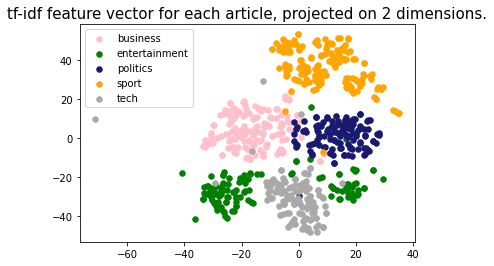

In [ ]:
for category, category_id in sorted(category_to_id.items()):
    points = projected_features[(labels[indices] == category_id).values]
    plt.scatter(points[:, 0], points[:, 1], s=30, c=colors[category_id], label=category)
plt.title("tf-idf feature vector for each article, projected on 2 dimensions.",
          fontdict=dict(fontsize=15))
plt.legend()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

from sklearn.model_selection import cross_val_score


models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

In [ ]:
from sklearn.model_selection import train_test_split

model = LogisticRegression(random_state=0)

X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, data.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)
y_pred = model.predict(X_test)

In [ ]:
indices_test

Int64Index([ 384, 1983,  985, 1386, 1294, 1293, 1259, 1978, 1123, 1405,
            ...
             408,  434, 1081,  219,  748, 1188,  272, 1453,  893,  720],
           dtype='int64', length=735)

Text(0.5, 15.0, 'Predicted')

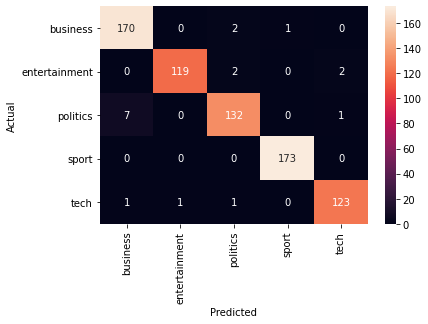

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.newstype.values, yticklabels=category_id_df.newstype.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [ ]:
model.fit(features, labels)

LogisticRegression(random_state=0)

In [ ]:
texts = ["Soccer Football - Copa America 2021 - Final - Brazil v Argentina - Estadio Maracana, Rio de Janeiro, Brazil - July 10, 2021 Argentina's",]
text_features = tfidf.transform(texts)
predictions = model.predict(text_features)
for text, predicted in zip(texts, predictions):
    print('"{}"'.format(text))
    print("  - Predicted as: '{}'".format(id_to_category[predicted]))
    print("")

"Soccer Football - Copa America 2021 - Final - Brazil v Argentina - Estadio Maracana, Rio de Janeiro, Brazil - July 10, 2021 Argentina's"
  - Predicted as: 'sport'

